In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [232]:
df=pd.read_csv('Regression_Insurance_Data.csv')
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [233]:
df.tail()

,age,sex,bmi,classif,children,smoker,region,charges
1333,50,male,30.97,OB1,3,no,northwest,10600.5483
1334,18,female,31.92,OB1,0,no,northeast,2205.9808
1335,18,female,36.85,OB2,0,no,southeast,1629.8335
1336,21,female,25.80,PREO,0,no,southwest,2007.9450
1337,-1,female,29.07,PREO,0,yes,northwest,29141.3603


In [234]:
df.shape

(1338, 8)

In [235]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [236]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [237]:
for i in df.columns:
    uni=df[i].unique()
    print(uni)

[ 19  18  28   0  32  31  46  37  60  25  62  23  56  27  52  30  34  59
  63  55  22  26  35  24  41  38  36  21  48  40  58  53  43  64  20  61
  44  57  29  45  54 -58  49  47  51  42  50  39  33 190  -1]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75 

In [238]:
for i in df.columns:
    val=df[i].value_counts()
    print(val)

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [239]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [240]:
df_copy=df.copy()

In [241]:
df_copy['classif']=df_copy['classif'].fillna(df_copy['classif'].mode()[0])

In [242]:
df_copy.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [243]:
col=['sex','classif','children','smoker','region']
def category(col):
    df_copy[col]=df_copy[col].astype('category')
    

In [244]:
category(col)

In [245]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   classif   1338 non-null   category
 4   children  1338 non-null   category
 5   smoker    1338 non-null   category
 6   region    1338 non-null   category
 7   charges   1338 non-null   float64 
dtypes: category(5), float64(2), int64(1)
memory usage: 38.9 KB


In [246]:
cat=df_copy.select_dtypes(include='category')
num=df_copy.select_dtypes(exclude='category')
print(cat.columns)
print(num.columns)

Index(['sex', 'classif', 'children', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'charges'], dtype='object')


In [247]:
lbl_encoder=LabelEncoder()
for i in cat:
    df_copy[i]=lbl_encoder.fit_transform(df_copy[i])
    print(lbl_encoder.classes_)
df_copy.head(2)     

['female' 'male']
['N' 'OB1' 'OB2' 'OB3' 'PREO' 'UW']
[0 1 2 3 4 5]
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.90,4,0,1,3,16884.9240
1,18,1,33.77,1,1,0,2,1725.5523


In [248]:
sd=StandardScaler()
df_copy[num.columns]=sd.fit_transform(df_copy[num.columns])
df_copy.head(2)

,age,sex,bmi,classif,children,smoker,region,charges
0,-1.346465,0,-0.453320,4,0,1,3,0.298584
1,-1.413341,1,0.509621,1,1,0,2,-0.953689


<AxesSubplot:>

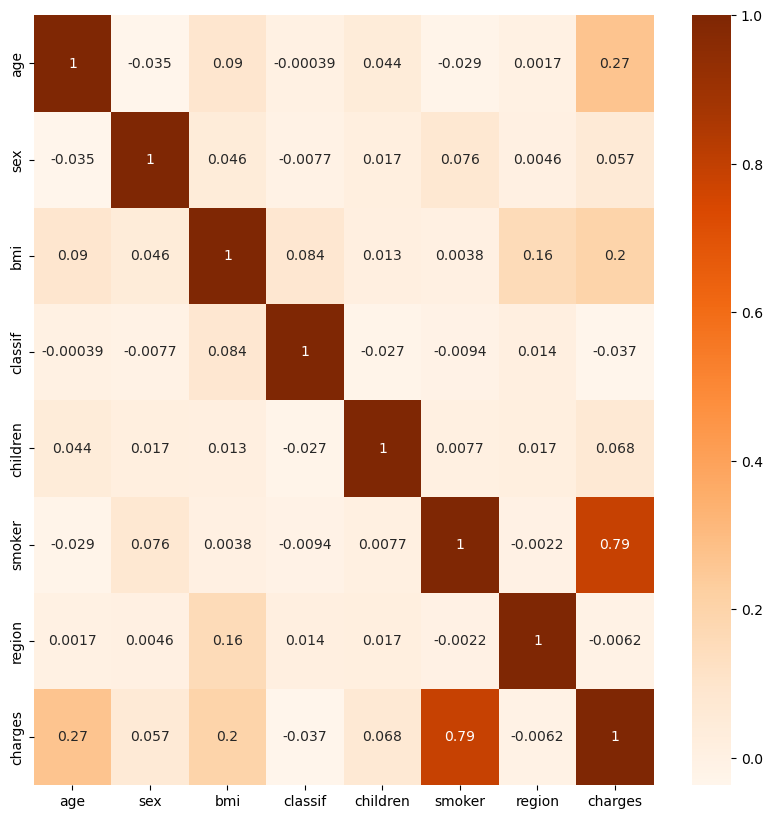

In [249]:
plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='Oranges')

# EDA

Text(0.5, 1.0, 'Boxplot of age')

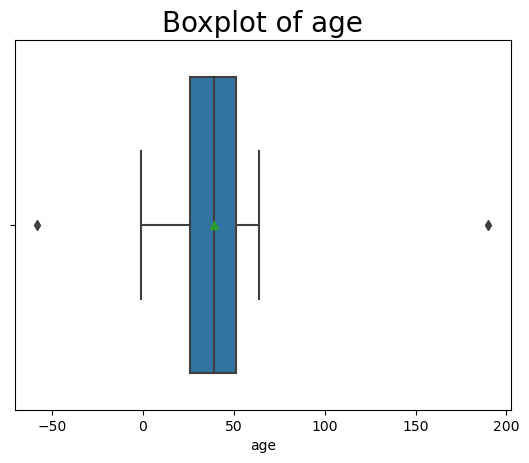

In [250]:
sns.boxplot(df['age'],hue=df['sex'],showmeans=True)
plt.title('Boxplot of age',fontsize=20)

Text(0.5, 1.0, 'Boxplot of charges')

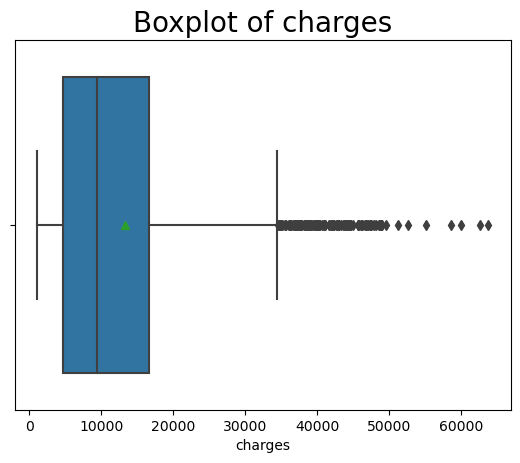

In [251]:
sns.boxplot(df['charges'],showmeans=True)
plt.title('Boxplot of charges',fontsize=20)

Text(0.5, 1.0, 'Piechart of sex')

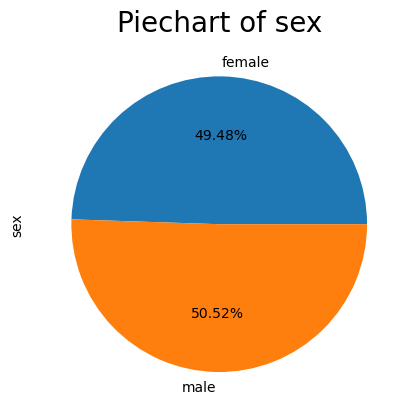

In [252]:
df.groupby('sex')['sex'].count().plot.pie(autopct='%0.2f%%')
plt.title('Piechart of sex',fontsize=20)

Text(0.5, 1.0, 'Countplot of smoker')

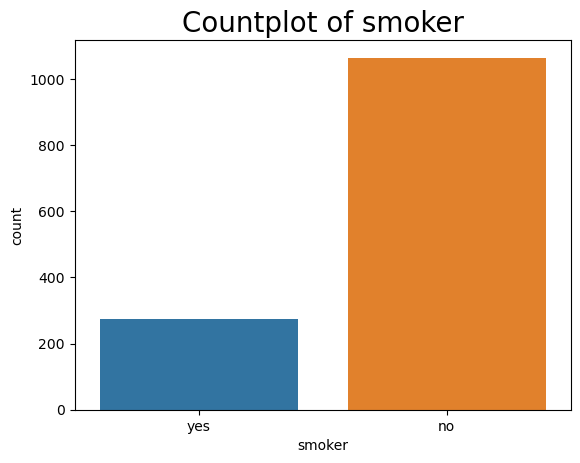

In [253]:
sns.countplot(df['smoker'])
plt.title('Countplot of smoker',fontsize=20)

Text(0.5, 1.0, 'Countplot of classif')

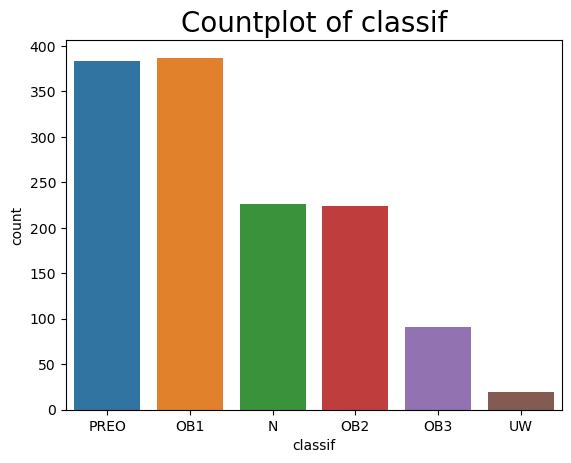

In [254]:
sns.countplot(df['classif'])
plt.title('Countplot of classif',fontsize=20)

Text(0.5, 1.0, 'Countplot of children')

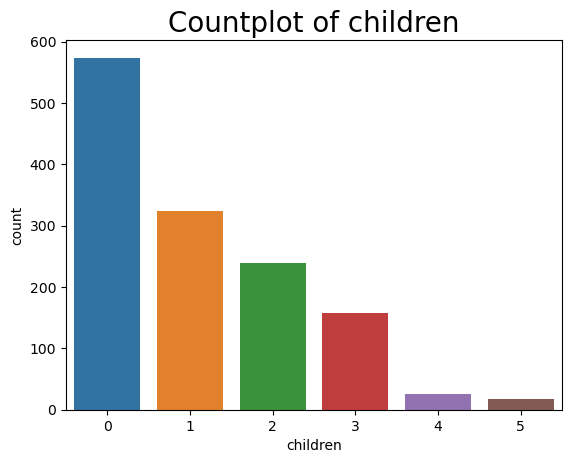

In [255]:
sns.countplot(df['children'])
plt.title('Countplot of children',fontsize=20)

Text(0.5, 1.0, 'Countplot of region')

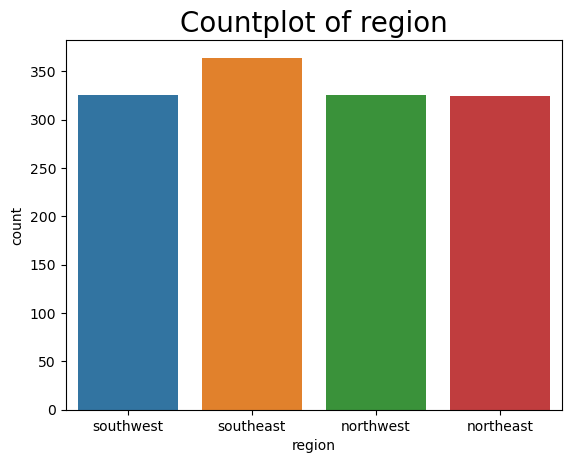

In [256]:
sns.countplot(df['region'])
plt.title('Countplot of region',fontsize=20)

# BIVARIATE ANALYSIS

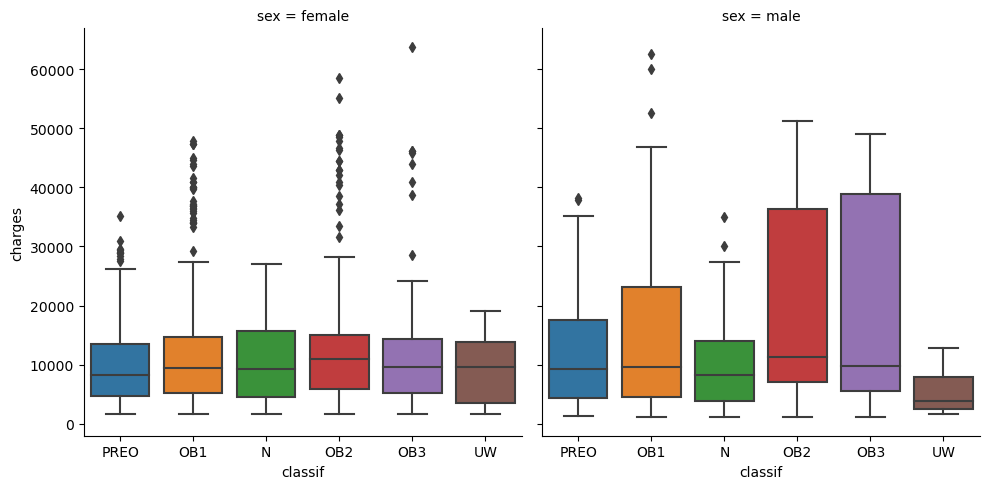

In [257]:
sns.catplot(x='classif',y='charges',col='sex',data=df,kind='box')

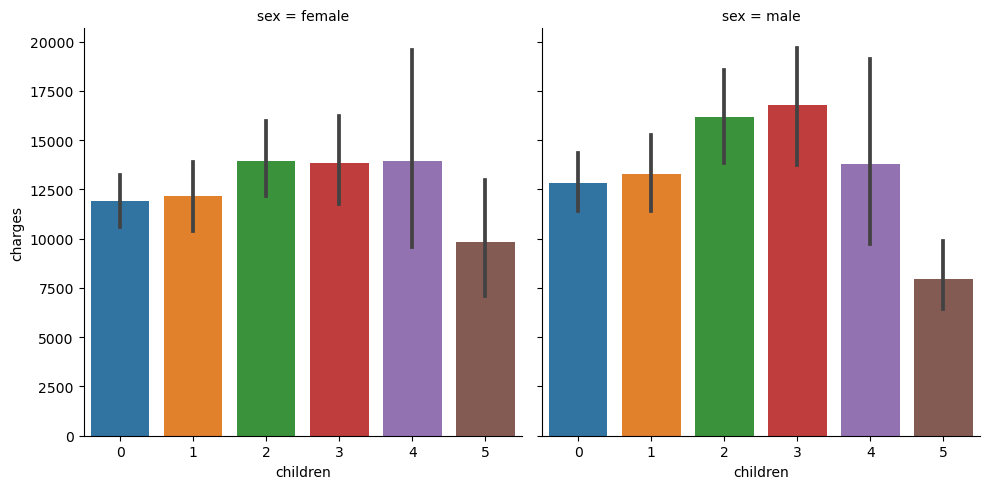

In [258]:
sns.catplot(x='children',y='charges',col='sex',data=df,kind='bar')

Text(0.5, 1.0, 'Bar chart of regionwise mean charges')

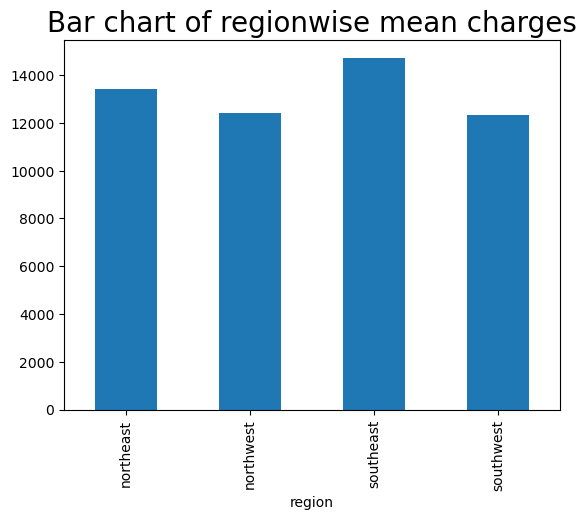

In [259]:
df.groupby('region')['charges'].mean().plot.bar()
plt.title('Bar chart of regionwise mean charges',fontsize=20)

Text(0.5, 1.0, 'Pie chart of smokers mean charges')

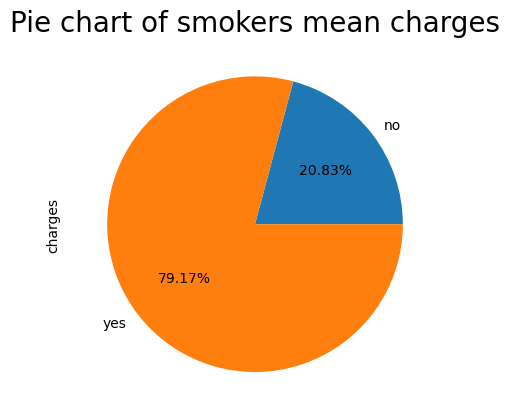

In [260]:
df.groupby('smoker')['charges'].mean().plot.pie(autopct="%0.2f%%")
plt.title('Pie chart of smokers mean charges',fontsize=20)

In [261]:
X=df_copy[['age','bmi','smoker','children']]
Y=df_copy['charges']

In [262]:
X.head(2)

,age,bmi,smoker,children
0,-1.346465,-0.453320,1,0
1,-1.413341,0.509621,0,1


In [263]:
Y.head(2)

0    0.298584
1   -0.953689
Name: charges, dtype: float64

In [264]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(936, 4) (936,)
(402, 4) (402,)


In [265]:

def regression(func):
    scoring=['neg_mean_absolute_error','neg_mean_absolute_percentage_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
    mse=[]
    rmse=[]
    mae=[]
    mape=[]
    R2=[]
    cv=cross_validate(func,X,Y,cv=10,scoring=scoring)
    print(cv)
    print('-----------------------------------------------------------------------------------------------------------------------------')
    mse.append(-np.mean(cv['test_neg_mean_squared_error']))
    rmse.append(-np.mean(cv['test_neg_root_mean_squared_error']))
    mae.append(-np.mean(cv['test_neg_mean_absolute_error']))
    mape.append(-np.mean(cv['test_neg_mean_absolute_percentage_error']))
    R2.append(np.mean(cv['test_r2']))
    print('MAE', mae,'\n','MSE' ,mse,'\n', 'RMSE',rmse,'\n','MAPE',mape,'\n','R2' ,R2)

# LINEAR REGRESSION

In [266]:
regression(LinearRegression())

{'fit_time': array([0.00398731, 0.00299191, 0.00298738, 0.00199437, 0.00199437,
       0.00299215, 0.00199533, 0.00199461, 0.00199461, 0.00299263]), 'score_time': array([0.00398779, 0.00399494, 0.00299311, 0.00299191, 0.00199485,
       0.00199413, 0.00199413, 0.00199509, 0.00299096, 0.00199342]), 'test_neg_mean_absolute_error': array([-0.36149194, -0.36214346, -0.35211344, -0.34753174, -0.38062432,
       -0.31207344, -0.31639996, -0.40194318, -0.34529765, -0.36640635]), 'test_neg_mean_absolute_percentage_error': array([-1.04274016, -1.1291075 , -1.56138497, -1.0600182 , -1.06410908,
       -0.88148583, -1.12888104, -1.14744227, -1.97693359, -1.03301308]), 'test_neg_mean_squared_error': array([-0.28195136, -0.26602621, -0.25076697, -0.26247815, -0.35846166,
       -0.18458646, -0.2167954 , -0.33204269, -0.22529232, -0.29492665]), 'test_neg_root_mean_squared_error': array([-0.53099092, -0.51577729, -0.50076638, -0.51232622, -0.59871668,
       -0.42963526, -0.46561293, -0.57623145, -0.

# DECISIONTREE REGRESSOR

In [267]:
regression(DecisionTreeRegressor(max_depth=4,max_features=4,random_state=0))

{'fit_time': array([0.00598431, 0.00398922, 0.00299191, 0.00299239, 0.00299144,
       0.00299215, 0.00398922, 0.00399017, 0.00299191, 0.        ]), 'score_time': array([0.00199842, 0.00399971, 0.00199366, 0.00299287, 0.00398922,
       0.00199413, 0.00299168, 0.0029912 , 0.00046277, 0.        ]), 'test_neg_mean_absolute_error': array([-0.22281343, -0.23664163, -0.24452193, -0.26511903, -0.24136417,
       -0.17144934, -0.20805616, -0.2589262 , -0.22771401, -0.24543259]), 'test_neg_mean_absolute_percentage_error': array([-0.63226405, -0.73803306, -1.37066316, -0.95780102, -0.88337639,
       -0.6793317 , -1.13143774, -0.71697939, -1.31019699, -0.80874511]), 'test_neg_mean_squared_error': array([-0.1363012 , -0.1477677 , -0.16040745, -0.22350298, -0.17159618,
       -0.06997948, -0.14217241, -0.20536244, -0.12602744, -0.16901012]), 'test_neg_root_mean_squared_error': array([-0.36918993, -0.38440565, -0.40050899, -0.47276102, -0.41424169,
       -0.26453635, -0.37705757, -0.45316933, -0.

# SUPPORT VECTOR REGRESSOR

In [268]:
regression(SVR())

{'fit_time': array([0.07767105, 0.04689598, 0.03778863, 0.04682446, 0.03775239,
       0.04686356, 0.04905796, 0.05052161, 0.05058765, 0.05058193]), 'score_time': array([0.0110383 , 0.01562381, 0.01566482, 0.0156219 , 0.01562238,
       0.01562238, 0.01012325, 0.01012731, 0.00807214, 0.00204897]), 'test_neg_mean_absolute_error': array([-0.16723435, -0.16866306, -0.2017449 , -0.21618329, -0.22753029,
       -0.14122897, -0.17708224, -0.23947404, -0.2010357 , -0.22409811]), 'test_neg_mean_absolute_percentage_error': array([-0.33113634, -0.38147656, -0.67950629, -0.64921691, -0.59389828,
       -0.4801119 , -0.5161752 , -0.51051738, -1.20131995, -0.67908885]), 'test_neg_mean_squared_error': array([-0.11523879, -0.13486158, -0.16412779, -0.19471002, -0.21942213,
       -0.07241926, -0.13860593, -0.23676864, -0.13608784, -0.20493804]), 'test_neg_root_mean_squared_error': array([-0.33946839, -0.36723504, -0.40512688, -0.44125959, -0.46842516,
       -0.26910827, -0.37229817, -0.48658878, -0.

# RANDOMFOREST REGRESSOR

In [269]:
regression(RandomForestRegressor(n_estimators=25,random_state=42,oob_score=True,max_depth=5))

{'fit_time': array([0.05189395, 0.02857327, 0.03128552, 0.03124237, 0.03940034,
       0.04101491, 0.04300737, 0.0497601 , 0.04103947, 0.04115248]), 'score_time': array([0.00399137, 0.01554465, 0.01561999, 0.01562142, 0.01026535,
       0.00811195, 0.        , 0.00213051, 0.01026368, 0.        ]), 'test_neg_mean_absolute_error': array([-0.20539143, -0.21441966, -0.2208639 , -0.2453442 , -0.22022332,
       -0.16232599, -0.19103172, -0.22664679, -0.20363334, -0.21897269]), 'test_neg_mean_absolute_percentage_error': array([-0.47587143, -0.63766227, -0.93994437, -0.96558349, -0.74134244,
       -0.61844602, -0.80298677, -0.59532908, -1.25606811, -0.73978778]), 'test_neg_mean_squared_error': array([-0.12016954, -0.13967815, -0.15077864, -0.20135558, -0.16164331,
       -0.0663741 , -0.1313598 , -0.18562564, -0.11709287, -0.16505611]), 'test_neg_root_mean_squared_error': array([-0.34665478, -0.37373541, -0.38830225, -0.44872662, -0.4020489 ,
       -0.25763171, -0.36243592, -0.43084294, -0.

# ADABOOST REGRESSOR 

In [270]:
regression(AdaBoostRegressor(random_state=42))

{'fit_time': array([0.03992343, 0.01396704, 0.00879049, 0.01566124, 0.02920771,
       0.01562238, 0.01562142, 0.01561928, 0.01562119, 0.01566124]), 'score_time': array([0.00299406, 0.00199509, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01562238, 0.00654387, 0.        ]), 'test_neg_mean_absolute_error': array([-0.39050068, -0.30078929, -0.33428814, -0.41970697, -0.32430369,
       -0.2880922 , -0.33609292, -0.33669108, -0.32735485, -0.35284947]), 'test_neg_mean_absolute_percentage_error': array([-1.41259114, -0.91677016, -1.83039658, -1.89088152, -1.28456199,
       -1.170784  , -1.20636829, -0.89928104, -1.64434833, -1.22573471]), 'test_neg_mean_squared_error': array([-0.2153584 , -0.16071533, -0.17723915, -0.25933744, -0.19379628,
       -0.11554055, -0.17838676, -0.1954322 , -0.15608449, -0.20081979]), 'test_neg_root_mean_squared_error': array([-0.46406724, -0.40089317, -0.4209978 , -0.50925185, -0.44022298,
       -0.33991256, -0.42235857, -0.44207714, -0.

# Interpretation
- By comparing the error percentage and R2 score of the various regression models ,Random Forest Regressor algorithm is performing good and chosen for solving our buisness problem

In [271]:
#RandomForest regressor for solving our buisness problem

In [272]:
rf_best=RandomForestRegressor(n_estimators=26,max_depth=4,random_state=42,oob_score=True,n_jobs=-1)

In [273]:
rf_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=26, n_jobs=-1, oob_score=True,
                      random_state=42)

In [274]:
#checking training performance
train_score=rf_best.score(x_train,y_train)
print('train_score=',train_score)

train_score= 0.8712915311792953


In [275]:
#checking test performance
test_score=rf_best.score(x_test,y_test)
print('test_score=',test_score)

test_score= 0.8648113600891005


In [276]:
#checking out of bag score 
oob_score=rf_best.oob_score_
print('oob_score=',oob_score)

oob_score= 0.8468179159585569


In [277]:
y_pred=rf_best.predict(x_test)
print(y_pred)

[-0.30928127 -0.62060737  1.1125685  -0.24753527  1.83346044 -0.58790233
 -0.81467751  0.09048042 -0.63002842 -0.13121874  0.45856487 -0.52339161
 -0.59971731  2.61649659  2.72489952  2.61649659 -0.13072454  2.60158921
 -0.27815013  0.89591306 -0.52572648 -0.33672632 -0.81467751 -0.81467751
 -0.12441125 -0.03705868  0.07002153 -0.59971731 -0.15352645 -0.81467751
 -0.44469753 -0.05295132 -0.81467751 -0.60202547 -0.61129042 -0.32666988
 -0.74026747 -0.36195558  0.92945397  2.44972973 -0.71369696 -0.74026747
 -0.03250068  0.08364228 -0.59971731  0.17565836 -0.71787116 -0.60442057
  2.53450104 -0.58790233  0.09048042 -0.7512188  -0.48252181 -0.81467751
 -0.05295132 -0.12441125 -0.67432401  2.57730117 -0.0380501  -0.07146622
  0.09048042 -0.58790233  0.2072093  -0.51652175 -0.14906318 -0.59971731
  0.4389996  -0.10982314 -0.60442057 -0.81467751 -0.49433679 -0.26690582
 -0.17836888 -0.52339161 -0.31791564 -0.62060737 -0.59971731 -0.04144463
 -0.59971731 -0.30928127 -0.81467751  1.1125685  -0

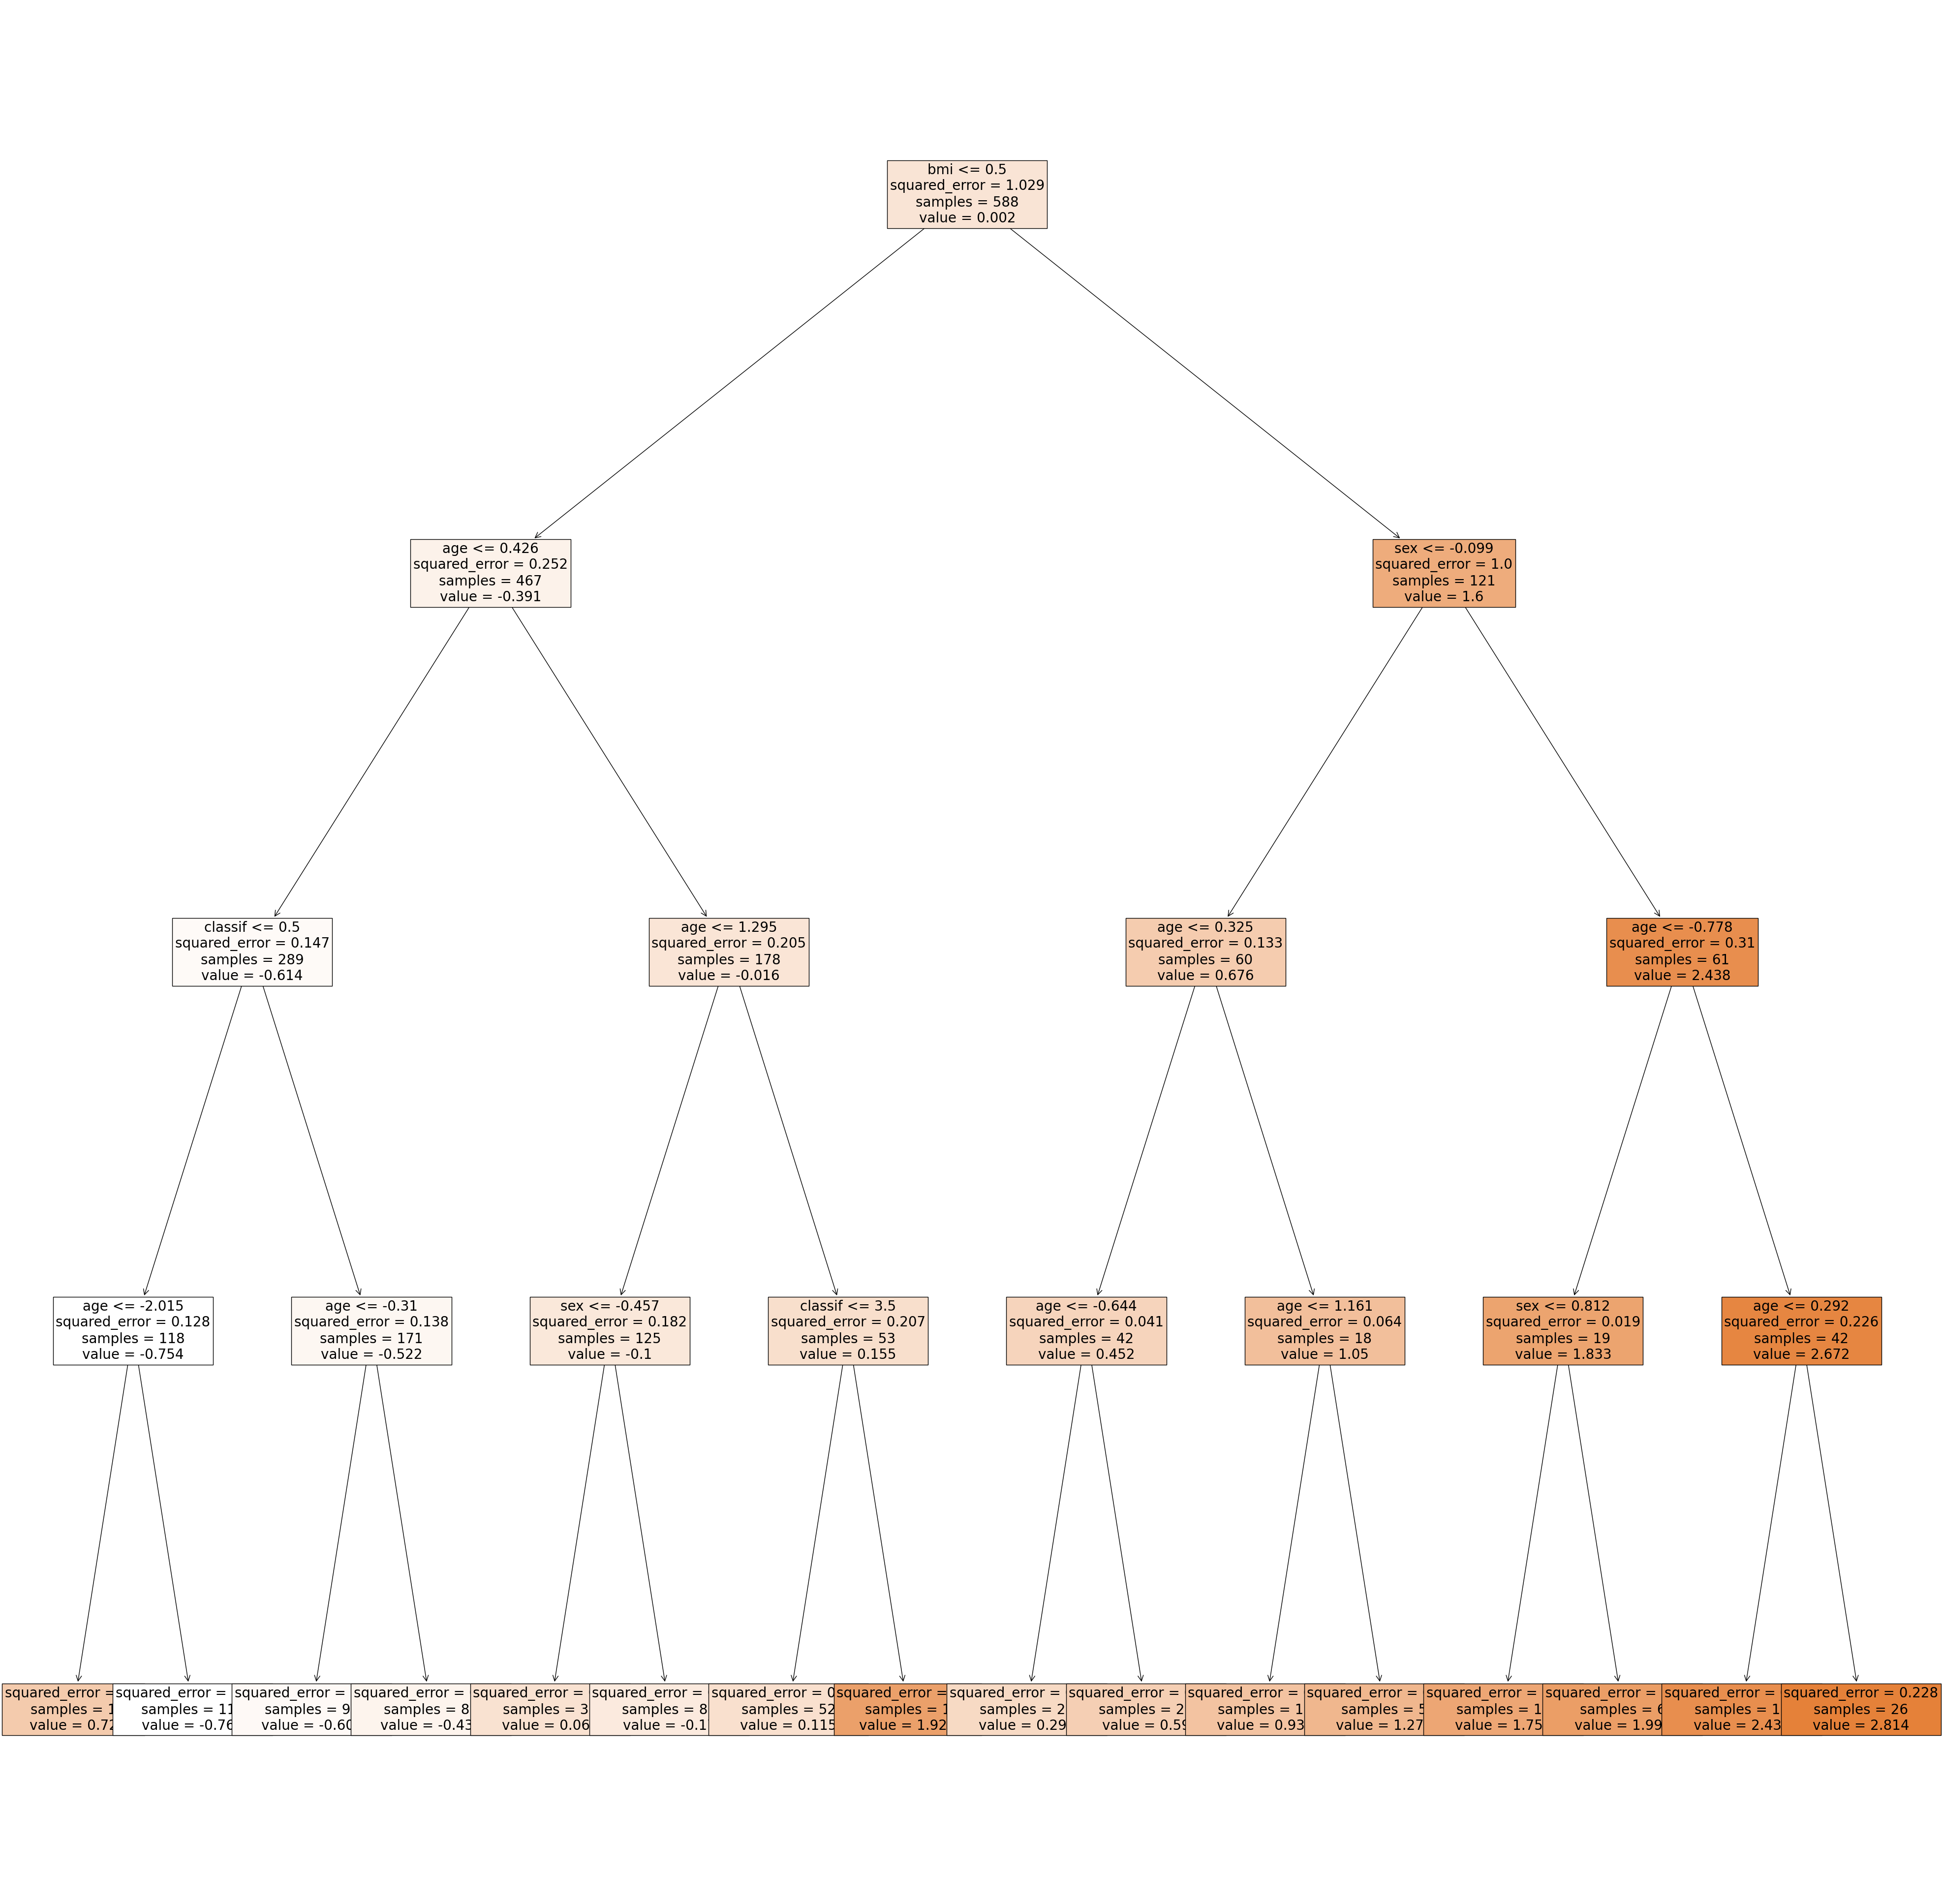

In [278]:
from sklearn import tree

plt.figure(figsize=(50,50))
plt.title('RandomForest Diagram')
t=rf_best.estimators_[0]
tree.plot_tree(t,filled=True,fontsize=20,feature_names=df_copy.columns)
plt.show()

# Grid Search CV to find the best parameters for random forest algorithm

In [279]:
from sklearn.model_selection import GridSearchCV
p={'n_estimators':[22,24,26,28,30,32],
  'max_depth':[4,8,12,16,20]}
rf=RandomForestRegressor()

In [280]:
gs=GridSearchCV(rf,param_grid=p,cv=10,scoring='r2')
gs

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'n_estimators': [22, 24, 26, 28, 30, 32]},
             scoring='r2')

In [281]:
gs.fit(X,Y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'n_estimators': [22, 24, 26, 28, 30, 32]},
             scoring='r2')

In [282]:
gs.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=30)

In [283]:
gs.best_score_

0.854856115703023

In [284]:
gs.cv_results_

{'mean_fit_time': array([0.03391418, 0.03265231, 0.03609033, 0.03653059, 0.03900266,
        0.04203899, 0.04024363, 0.04225166, 0.04926996, 0.04955721,
        0.05252137, 0.05541759, 0.04634559, 0.05232761, 0.05777562,
        0.06266649, 0.06831102, 0.07017226, 0.051298  , 0.0572314 ,
        0.06051803, 0.06663682, 0.07092156, 0.0757298 , 0.05211864,
        0.05721502, 0.06130555, 0.06635776, 0.06979618, 0.0737606 ]),
 'std_fit_time': array([0.00866839, 0.00317138, 0.00572498, 0.00407038, 0.00301685,
        0.00244436, 0.0049576 , 0.0030037 , 0.0031619 , 0.00336713,
        0.00239925, 0.00464813, 0.00421672, 0.00304841, 0.00433382,
        0.00370801, 0.00699066, 0.00239146, 0.00022192, 0.00456476,
        0.00245381, 0.00429615, 0.0024773 , 0.00396443, 0.00241462,
        0.00439537, 0.0006467 , 0.00405327, 0.00370502, 0.0037536 ]),
 'mean_score_time': array([0.00141015, 0.00225823, 0.00264122, 0.00242701, 0.00389278,
        0.0030643 , 0.00203941, 0.00286508, 0.00204067, 0.00

In [288]:
pip install pyvista

     ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 48.8/48.8 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


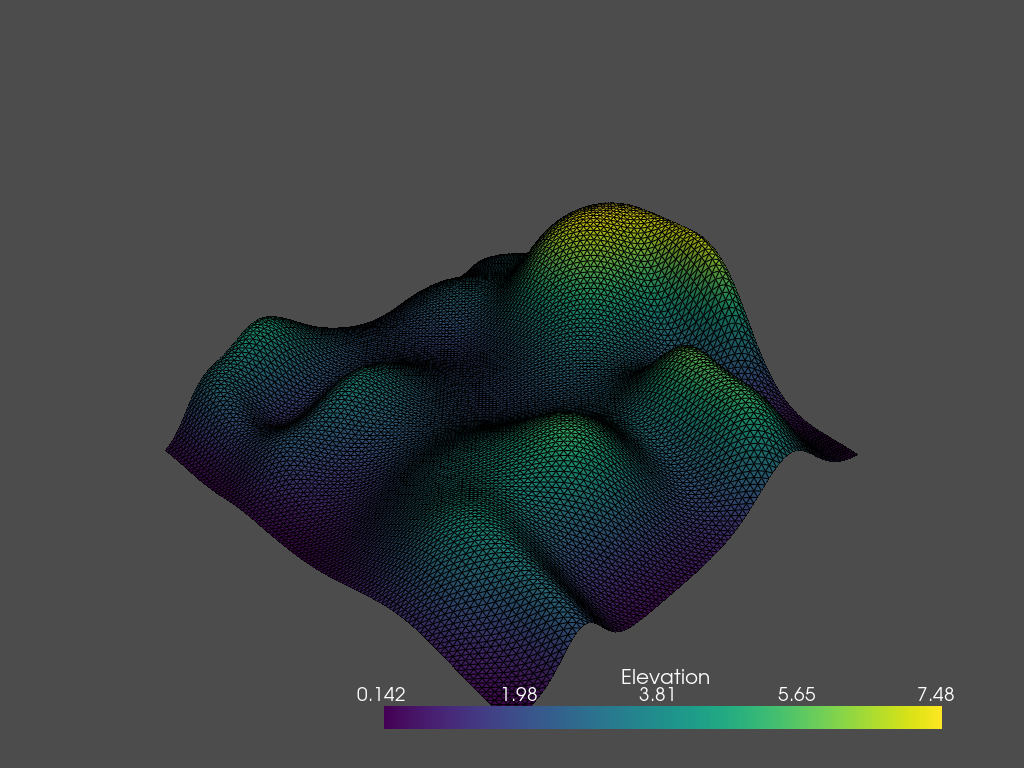

In [300]:
import pyvista as pv
from pyvista import examples

# Load example dataset
surface = examples.load_random_hills()

# Create a plotter object
plotter = pv.Plotter()

# Add the surface to the plotter
plotter.add_mesh(surface, show_edges=True)

# Show the plot
plotter.show()

In [301]:
surface

PolyData (0x29981162040)
  N Cells:	19602
  N Points:	10000
  N Strips:	0
  X Bounds:	-1.000e+01, 1.000e+01
  Y Bounds:	-4.486e-07, 2.000e+01
  Z Bounds:	1.416e-01, 7.483e+00
  N Arrays:	2

In [304]:
!pip install auto_eda

  Using cached auto_eda-0.1.8-py3-none-any.whl (4.5 kB)
  Using cached numpy-1.17.4.zip (6.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-0.25.3.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
  Running setup.py clean for pandas
Failed to build numpy pandas
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\lenovo\anaconda3\lib\site-packages\numpy-1.23.5.dist-info\
   from C:\Users\Lenovo\anaconda3\Lib\site-packages\~umpy-1.23.5.dist-info
  Moving to c:\users\lenovo\anaconda3\lib\site-pac

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [268 lines of output]
  Running from numpy source directory.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\Lenovo\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Lenovo\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\Lenovo\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Lenovo\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries 